In [123]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score,roc_curve,auc
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# https://www.kaggle.com/datasets/muhammadtalharasool/simple-gender-classification?select=gender.csv
df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/gender.csv').iloc[:,:-1]
df.columns = df.columns.str.strip()
df.Gender = df.Gender.str.strip()



Assign X, y
Train-test split
Visualize & speculate on training dataset
Train a logistic regression model
Evaluate the model, roc score
Explain findings

<AxesSubplot: >

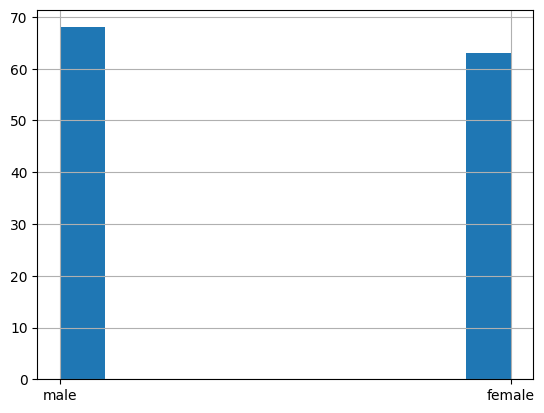

In [124]:
df.Gender.hist()


In [125]:
df.isnull().sum()


Gender             0
Age                0
Height (cm)        0
Weight (kg)        0
Occupation         0
Education Level    0
Marital Status     0
Income (USD)       0
Favorite Color     0
dtype: int64

In [126]:

df.head()

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow


In [127]:
df.columns

Index(['Gender', 'Age', 'Height (cm)', 'Weight (kg)', 'Occupation',
       'Education Level', 'Marital Status', 'Income (USD)', 'Favorite Color'],
      dtype='object')

In [128]:
from sklearn.linear_model import LogisticRegression

y = df['Gender']
x = df.iloc[:,1:]


In [129]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [130]:
cat_columns_df = x.select_dtypes(include = 'object')
cat_columns = cat_columns_df.columns.tolist()
cat_columns

['Occupation', 'Education Level', 'Marital Status', 'Favorite Color']

In [131]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
dummies = enc.fit_transform(x[cat_columns])

dummies.shape

(131, 68)

In [132]:
x= x.join(pd.DataFrame(dummies.toarray()))
x.drop(['Occupation', 'Education Level', 'Marital Status', 'Favorite Color'],axis = 1,inplace= True)
x.head()


,Age,Height (cm),Weight (kg),Income (USD),0,1,2,3,4,5,...,58,59,60,61,62,63,64,65,66,67
0,32,175,70,75000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25,182,85,45000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41,160,62,120000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,38,178,79,90000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29,165,58,35000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [134]:
## applying standard scaler as income value range is much higher than of other numerical columns
sc = preprocessing.StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [135]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_hatp = model.predict_proba(x_test)
# score  = model.score(x_test,y_test)
print(y_pred)
# score

test_accuracy = accuracy_score(y_pred,y_test)
test_accuracy

['male' 'male' 'female' 'female' 'male' 'female' 'male' 'male' 'female'
 'male' 'female' 'female' 'female' 'female' 'female' 'male' 'male' 'male'
 'female' 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'female']


C:\Users\WELCOME\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\WELCOME\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\WELCOME\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


1.0

In [136]:
# roc_auc_score(y, clf.predict_proba(X)[:, 1])
roc_auc_score(y_test, y_hatp[:,1])


1.0

In [137]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, y_hatp[:,1])
print(f"ROC AUC: {score:.4f}")

ROC AUC: 1.0000
